## Problem 2.11 Write a procedure based on algorithm 2.1 that solves the system $av = b$.
## Using a vector length of $100$ for z.

In [1]:
import numpy as np
## Solving the tridiagonal matrix 2.18
## a = alpha vector
## beta = beta vector
## gam = gamma vector
## b = b vector
## matmult creates the coefficient matrix using the alpha, beta, and gamma vectors and then does a matrix multiplication 
## by the true x vector to return the b vector
def matmult(a,beta,gam,z):
    A = np.diag(beta,1)+np.diag(beta,-1)+np.diag(a,0)
    b = np.dot(A,z)
    return b
##This is the first for loop in algorithm 2.1, and stores the c vector and the m vector.
def gauss1(a,beta,gam,b):
    delta = np.zeros(len(b))
    delta[0]=a[0]
    c = np.zeros(len(b))
    c[0] = b[0]        #
    m = np.zeros(len(b)-1)
    for i in range(1, len(b),1):
        m[i-1] = beta[i-1]/delta[i-1] # Must use i-1 for the indexing in m 
        delta[i] = a[i]-m[i-1]*gam[i-1] # must use i-1 for indexing in gam
        c[i] = b[i] - m[i-1]*c[i-1]
    v = np.zeros(len(c))
    v[-1] = c[-1]/delta[-1]
    for i in range(len(v)-1,0,-1): 
        v[i-1]=(c[i-1]-gam[i-1]*v[i])/delta[i-1]
    return v
n = 100
a = np.ones(n)*2.
# beta and gamma have a length 0f 99, and the for loop goes to 99,
#which is out of the indexing range of the vector. Compensate by shifting
# the indexing down by one in the for loop in gauss1.
beta = np.ones(n-1)*-1.
gam = np.ones(n-1)*-1.
z = np.random.rand(n) #creating a random vector to solve
zf = matmult(a,beta,gam,z)
v= gauss1(a,beta,gam,zf)
print 'The actual value of x is:', z
print 'The computed value of x from algorithm 2.1 is:', v


    

The actual value of x is: [ 0.06911054  0.40365398  0.67004475  0.8800994   0.86428322  0.98194069
  0.24679068  0.48563691  0.07561848  0.37007089  0.70770514  0.50050135
  0.84538095  0.89885279  0.05083828  0.8180626   0.45238173  0.01528779
  0.60237559  0.86150219  0.41969084  0.673171    0.03278206  0.38409368
  0.30048766  0.2664289   0.97660341  0.12381154  0.54389571  0.30367139
  0.64087258  0.58662625  0.78846863  0.09337772  0.74536049  0.43738948
  0.19333331  0.88426201  0.61701094  0.05710682  0.22490119  0.13010459
  0.98272472  0.46898303  0.04928167  0.8933244   0.30671499  0.50202391
  0.94467065  0.60445544  0.92191685  0.3467981   0.21198426  0.00630157
  0.06279289  0.08430298  0.61380701  0.45418401  0.20482786  0.78360704
  0.73874457  0.09000958  0.67569356  0.88604229  0.75261839  0.54475781
  0.30427786  0.87850546  0.26354815  0.52360423  0.45121591  0.1448703
  0.13102259  0.93463555  0.61079773  0.49410223  0.63276247  0.49281024
  0.00616636  0.16982662  

In [3]:
## Using Troy's first test to verify that my algorithm is working well.
n=4
A = np.zeros((n,n))
np.fill_diagonal(A,2)
A += np.diag(-np.ones(n-1),k=1)
A += np.diag(-np.ones(n-1),k=-1)
# Now perform tests
print '============================================================='
print 'Test 1: Check obtaining standard basis vectors for 4-d system'
print '============================================================= \n\n'
for i in xrange(0,n):
    e = np.zeros(n)
    e[i] = 1
    b = np.dot(A,e)
    print gauss1(A.diagonal(),A.diagonal(-1),A.diagonal(1),b)

Test 1: Check obtaining standard basis vectors for 4-d system


[ 1.  0.  0.  0.]
[ 0.  1.  0.  0.]
[ 0.  0.  1.  0.]
[ 0.  0.  0.  1.]


In [5]:
## Using Troy's second test to verify that my algorithm is working well.
n = 100
# Now make A
A = np.zeros((n,n))
np.fill_diagonal(A,2)
A += np.diag(-np.ones(n-1),k=1)
A += np.diag(-np.ones(n-1),k=-1)
# Now perform tests
print '============================================================='
print 'Test 2: Check obtaining solution of random b for 100-D system'
print '============================================================= \n\n'
z = np.random.randn(n)
b = np.dot(A,z)
print np.linalg.norm(gauss1(A.diagonal(),A.diagonal(-1),A.diagonal(1),b)-z,np.inf)

Test 2: Check obtaining solution of random b for 100-D system


2.35367281221e-14


This is not as accurate as Troy's algorithm, by a factor of 3, but is still on the order of machine precision. It is possible that my algorithm is inefficient, and accumulating more error as a result.

## Exercise 2.13 
## We want to solve 
$$
Av_{l} = b_{l}
$$
## for $l=1,...,N.$  Here the matrix $A /in R^{n,n}$ is given by (2.18) and does not depend on $l$. The  right-hand side of  $b_{l} \in  R^{n,n}$ is given for each value of $l$.
## (a) Modify algorithm 2.1 from 2.11 by introducing the following three steps:
### 1. Compute the factors $m_{k}, \delta_{k}$ for  $k = 1,...,n.$
### 2. Compute $c_{k}$  for  $k = 1,...,n.$
### 3. Compute $v_{k}$  for  $k = 1,...,n.$

# Solution:
## Step 1. Create a code block that will store vector values of $m_{k}$ and $ \delta_{k}$ for further use.

In [54]:
#Although it looks like I copied and pasted your solution I actually modified on my own and fixed my indexing errors.
## This structure is much nicer than the mess I put together, so thank you.
import numpy as np
## Solving the tridiagonal matrix 2.18
## a = alpha vector
## beta = beta vector
## gam = gamma vector
## b = b vector
def gauss_modified(a=None, beta=None, gam=None, m=None, delta=None, b=None):
    if a ==None and beta == None and gam == None and delta == None and b == None:
        raise inputerror('Feed me data! Data monster is hungry!')
    if m == None and delta == None and b!=None:
        v = np.zeros(len(c))
        c = np.zeros(len(b))
        delta = np.zeros(len(a))
        delta[0]=a[0]
        m = np.zeros(len(a)-1)
        for i in range(1, len(a),1):
            m[i-1] = beta[i-1]/delta[i-1] # Must use i-1 for the indexing in m 
            delta[i] = a[i]-m[i-1]*gam[i-1] # must use i-1 for indexing in gam
        c[0] = b[0]    
        for i in range(1,len(b),1):   
            c[i] = b[i] - m[i-1]*c[i-1] 
        v[-1] = c[-1]/delta[-1]
        for i in range(len(v)-1,0,-1): 
            v[i-1]=(c[i-1]-gam[i-1]*v[i])/delta[i-1]
        return v
    if m == None and delta == None and b==None:
        delta = np.zeros(len(a))
        delta[0]=a[0]
        m = np.zeros(len(a)-1)
        for i in range(1, len(a),1):
            m[i-1] = beta[i-1]/delta[i-1] # Must use i-1 for the indexing in m 
            delta[i] = a[i]-m[i-1]*gam[i-1] # must use i-1 for indexing in gam
        return m,delta
    else:
        n = np.size(b)
        c = np.zeros(n)
        v = np.zeros(n)
        c[0] = b[0]    
        for i in range(1,len(b),1):   
            c[i] = b[i] - m[i-1]*c[i-1] 
        v[n-1] = c[n-1]/delta[n-1] #This was causing me problems. I confused the index [-1] for [n-1], which messed up my unit test
        for i in range(n-2,-1,-1): 
            v[i]=(c[i]-gam[i]*v[i+1])/delta[i]
        return v
n = 100
a = np.ones(n)*2.
beta = np.ones(n-1)*-1.
gam = np.ones(n-1)*-1.
[m, delta]= gauss1(a,beta,gam)

In [55]:
n = 4
# Now make A
A = np.zeros((n,n))
np.fill_diagonal(A,2)
A += np.diag(-np.ones(n-1),k=1)
A += np.diag(-np.ones(n-1),k=-1)
m, delta = gauss_modified(a=A.diagonal(),
                            beta=A.diagonal(-1),
                            gam=A.diagonal(1))

# Now perform tests
print '============================================================='
print 'Test 1: Check obtaining standard basis vectors for 4-d system'
print '============================================================= \n\n'
for i in xrange(0,n):
    e = np.zeros(n)
    e[i] = 1
    b = np.dot(A,e)
    [m, delta]= gauss1(a,beta,gam)
    print gauss_modified(gam=A.diagonal(-1),m=m,delta=delta,b=b)

Test 1: Check obtaining standard basis vectors for 4-d system


[ 1.  0.  0.  0.]
[ 0.  1.  0.  0.]
[ 0.  0.  1.  0.]
[ 0.  0.  0.  1.]


C:\Users\EvanD\Anaconda2\lib\site-packages\ipykernel\__main__.py:8: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
C:\Users\EvanD\Anaconda2\lib\site-packages\ipykernel\__main__.py:10: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
C:\Users\EvanD\Anaconda2\lib\site-packages\ipykernel\__main__.py:26: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


In [58]:
'''
Test 2: Generating random 100-dimensional vector z, compute b=Az, 
and solve for v in Av=b. 

To test that v is close to z component-wise,  we use the 
infinity-norm: ||v-z||_\infty.
'''
n = 100
# Now make A
A = np.zeros((n,n))
np.fill_diagonal(A,2)
A += np.diag(-np.ones(n-1),k=1)
A += np.diag(-np.ones(n-1),k=-1)
m, delta = gauss_modified(a=A.diagonal(),
                            beta=A.diagonal(-1),
                            gam=A.diagonal(1))
# Now perform tests
print '============================================================='
print 'Test 2: Check obtaining solution of random b for 100-D system'
print '============================================================= \n\n'
z = np.random.randn(n)
b = np.dot(A,z)
print np.linalg.norm(gauss_modified(gam=A.diagonal(-1),m=m,delta=delta,b=b)-z,np.inf)

Test 2: Check obtaining solution of random b for 100-D system


2.02060590482e-14


C:\Users\EvanD\Anaconda2\lib\site-packages\ipykernel\__main__.py:8: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
C:\Users\EvanD\Anaconda2\lib\site-packages\ipykernel\__main__.py:10: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
C:\Users\EvanD\Anaconda2\lib\site-packages\ipykernel\__main__.py:26: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


The infinity norm is of order machine epsilon, to my algorithm may be picking up round off error along the way.

## (b) Use the modified algorithm to generate a solution to the following problem:
$$
-u''(x) = e^{x/l},\qquad u(0) = u(1) = 0 
$$
## Solution:
## First define $n=100$, therefore $h^2 = 10^{-4}$, so $b_{j} = h^2e^{\frac{x_{j}}{l}}$, where $l = 1,2,...,10$. We can use the same matrix A due to the boundary conditions of the problem. To solve we generate a b vector, with $x = 0.01, 0.02,...,0.99$, then use the modified algorithm to solve for v.



C:\Users\EvanD\Anaconda2\lib\site-packages\ipykernel\__main__.py:8: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
C:\Users\EvanD\Anaconda2\lib\site-packages\ipykernel\__main__.py:10: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
C:\Users\EvanD\Anaconda2\lib\site-packages\ipykernel\__main__.py:26: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


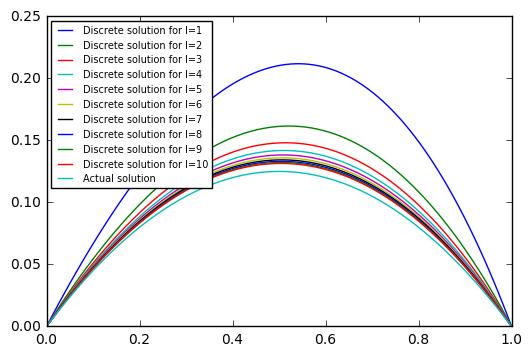

In [72]:
%matplotlib inline
import matplotlib.pyplot as plt
n = 100
beta = np.ones(n-1)*-1
gam = np.ones(n-1)*-1
a = np.ones(n)*2
A = np.diag(gam,1)+np.diag(beta,-1)+np.diag(a,0)
m, delta = gauss_modified(a = A.diagonal(),beta = A.diagonal(-1), gam = A.diagonal(1))
x = np.linspace(0,1,n+2)
h = x[1]-x[0]
v = np.zeros(n+2)
u = 0.5*x*(1-x)
for j in range(1,11,1):
    b = h**2*np.exp(x[1:-1]/j)
    v[1:-1] = gauss_modified(gam = A.diagonal(-1),m=m,delta = delta,b=b)
    plt.plot(x,v, label = 'Discrete solution for l='+str(j))
plt.plot(x,u,label = 'Actual solution')
plt.legend(loc = 'best',fontsize = 7)


It is apparent from this graph that the discrete solution approaches the actual solution as l approaches infinity.

## Exercise 2.14 Consider the boundary value problem
$$
-u''(x) = f(x),\qquad u(0) - 0,\qquad u'(1) =1.
$$
## (a) Use the following two schemes to reconcile the Dirichlet boundary condition:
## S1 approximates $u'(1)$ to be.
$$
\frac{u_{n+1} - u_{n}}{h} = 1
$$
## S2 uses an auxiliary variable $u_{n+2}$ to approximate the boundary condition at $x=1$ to be:
$$
\frac{u_{n+2} - u_{n}}{2h} = 1
$$
## For both of these schemes, find the corresponding matrices, $A_{1}$ and $A_{2}$, and right hand side, $b_{1}$ and $b_{2}$, such that the two approximations defined by the schemes can be found by solving the linear systems
$$ 
A_{1}v_{1} = b_{1}\qquad A_{2}v_{2} = b_{2}.
$$
## Scheme 1 solution: Use scheme 1 to solve for $u_{n+1}$, and modify the coefficient matrix A to account for the new boundary conditions.
$$
u_{n+1}-u_{n} = h \\
$$ 
## So matrix $A_{1}$ becomes:
$$
\begin{bmatrix}
        2       & -1 & 0 & \dots & 0 & 0& 0 \\
        -1       & 2 & -1 & \dots & 0 & 0& 0 \\
        \vdots   &&&         \ddots\\
        0       & 0 & 0 & \dots & -1 & 2 & -1\\
        0       & 0 & 0 & \dots &  0 & -1 & 1
    \end{bmatrix}
    $$
## The $b_{1}$ vector is:
$$
h^2
\begin{bmatrix}
        f(x_{1})\\
        f(x_{2})\\
        \vdots\\
        f(x_{n})\\
        \frac{1}{h}
        \end{bmatrix}
        $$
## Scheme 2 solution: Scheme 2 requires us to use the auxiliary equation and the discrete definition of the second derivative at the point $x_{n+1}$. Using the auxiliary equation to solve for $u_{n+2}$
$$
u_{n+2} = 2h + u_{n}
$$
## Subsitituting this into the definition for the discrete second derivative:
$$
-u''(x)\approx \frac{-u_{n+2} + 2u_{n+1} -u_{n}}{h^2}\\
\frac{-u_{n+2} + 2u_{n+1} - u_{n}}{h^2} = \frac{-2h - u_{n} + 2u_{n+1}-u_{n}}{h^2}\\
=\frac{-2h - 2u_{n} + 2u_{n+1}}{h^2} 
$$
## So we can rewrite the boundary condition with the auxiliary function as
$$
 \frac{-2h - 2u_{n} +2u_{n+1}}{h^2} = f(x_{n+1})\\
 -u_{n} + u_{n+1} = \frac{h^2}{2}f(x_{n+1}) + h
$$
## The $A_{2}$ matrix for this scheme is identical to $A_{1}$:
$$ 
\begin{bmatrix}
    2       & -1 & 0 & \dots & 0 & 0& 0 \\
    -1       & 2 & -1 & \dots & 0 & 0& 0 \\
    \vdots   &&&         \ddots\\
    0       & 0 & 0 & \dots & -1 & 2 & -1\\
    0       & 0 & 0 & \dots &  0 & -1 & 1
\end{bmatrix}
$$
## The $b_{2}$ vector is
$$
\begin{bmatrix}
        h^2f(x_{1})\\
        h^2f(x_{2})\\
        \vdots\\
        h^2f(x_{n})\\
        \frac{h^2}{2}f(x_{n+1}) + h
        \end{bmatrix}
        $$

## Exercise 2.14 (b) Are the matrices $A_{1}$ and $A_{2}$ :
## (i) symmetric? 
## Yes, $A_{1}^T = A_{1}$, and $A_{2}^T = A_{2}$.
## (ii) Diagonally dominant? 
## Yes, for all $k = 1,2,...,n$ in the matrix $A^{n\times n}$ 
$$
|\alpha_{k}| \ge |\beta_{k}| + |\gamma_{k}|
$$
## (iii) Positive definite? 
## Use python to determine the eigenvalues of coefficient matrix $A_{1}$ and $A_{2}$ by first creating each matrix, then using the linear algebra toolkit in python to find the eigenvalues of the matrix, and find the smallest eigenvalue in the matrix.
## The smallest eigenvalue of $A1$ and $A2$ are determined below.




In [2]:
n = [100,1000,10000]
for n in n:
    A = np.zeros((n+1,n+1))
    a = np.ones(n+1)*2
    beta = np.ones(n)*-1.
    gam = np.ones(n)*-1.
    A = np.diag(beta,1)+np.diag(beta,-1)+np.diag(a,0)
    A[-1,-1] = 1
    eig = np.linalg.eigvals(A)    
    print 'The smallest eigenvalue of matrix A1 and A2 is:', min(eig)
    if min(eig) <= 0:
        print 'The matrices A1 and A2 are not positive definite'
    else:
        print 'The matrices A1 and A2 are positive definite'


The smallest eigenvalue of matrix A1 and A2 is: 0.00023949640663
The matrices A1 and A2 are positive definite
The smallest eigenvalue of matrix A1 and A2 is: 2.46001501451e-06
The matrices A1 and A2 are positive definite
The smallest eigenvalue of matrix A1 and A2 is: 2.46666104539e-08
The matrices A1 and A2 are positive definite


The matrices A1 and A2 are positive definite, but in the limit that n approaches infinity the eigenvalues approach zero, so the matrices are positive definite for finite values of n.

## Let $f(x) = -e^{x-1}$, and show that 
$$ u(x) = e^{-1}(e^x - 1)$$
## is the exact solution to 2.51. 
## Solution: Evaluate the integral and apply the boundary conditions:
$$
u''(z) = e^{z-1}
$$
## By the fundamental theorem of calculus
$$
u'(y) = u'(0) + e^{y-1}
$$
## Applying right boundary condition.
$$
u'(1) = u'(0) +1 = 1
u'(0) = 0
$$
## Integrating again:
$$
u(x) = c + e^{x-1}
$$
## Applying the left boundary condition:
$$
u(0) =  c + e^{-1} = 0\\
c = -e^{-1}\\
u(x) = e^{-1}(e^x - 1)
$$


## 2.14 (c) Compare the numerical approximated solutions generated by the schemes, $S_{1}$ and $S_{2}$ to the exact solution above by computing the error for both schemes.
## Solution: Use python to solve the problem:
$$
A^{-1}b = v
$$
## for each matrix and corresponding b vector.



## Determine the rate of convergence for S1 using methods developed in project 1.1.

The error between the real and discrete solution is 0.0443307701628
The error for n = 20 is 0.0235011316883
The rate of convergence is 0.981447238051
The error for n = 40 is 0.0121142131746
The rate of convergence is 0.990463401309
The error for n = 80 is 0.00615210952088
The rate of convergence is 0.995164007161
The error for n = 160 is 0.00310034296939
The rate of convergence is 0.997564737241


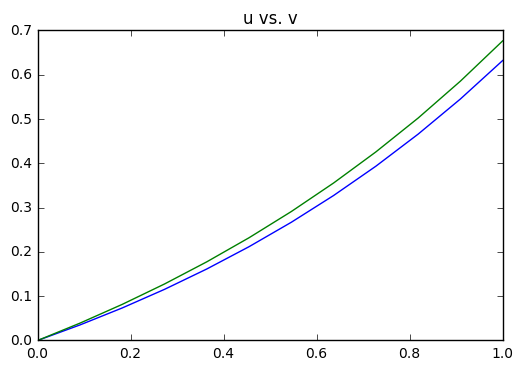

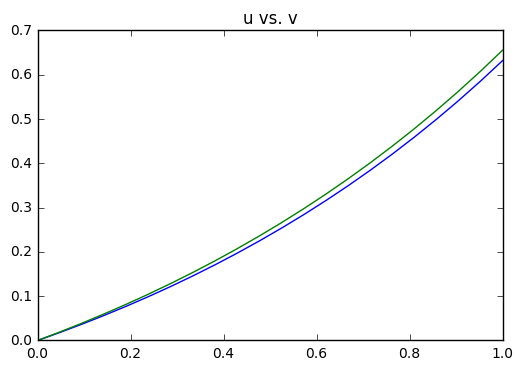

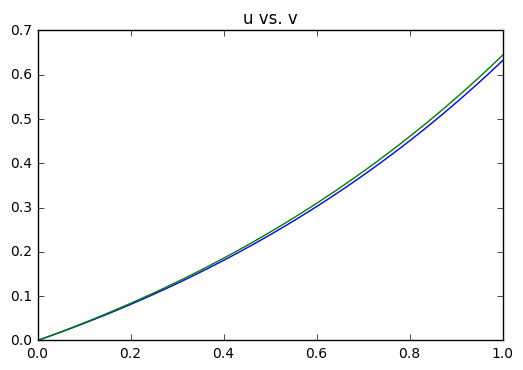

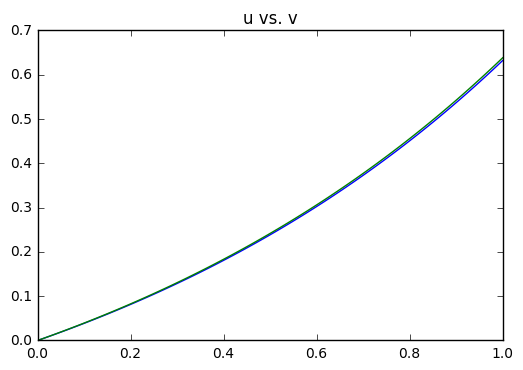

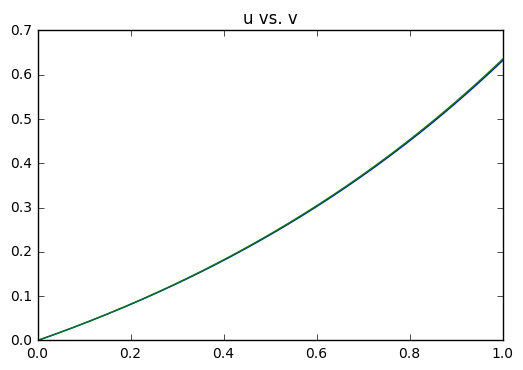

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline
n = [10,20,40,80,160]
h = np.zeros(len(n))
alpha = np.zeros(len(n))
Er = np.zeros(len(n))
count = 0
for n in n:
    b = np.zeros(n+1)
    v = np.zeros(n+2)
    A = np.zeros((n+1,n+1))
    x = np.linspace(0,1,n+2)
    h[count] = x[1]-x[0]
    np.fill_diagonal(A,2)
    A+=np.diag(-1*np.ones(n),-1)
    A+=np.diag(-1*np.ones(n),1)
    A[n,n] = 1
    b = -h[count]**2*np.exp(x-1)
    b[-1] = h[count]
    v[1:] = np.linalg.solve(A,b[1:])
    u = np.exp(-1)*(np.exp(x)-1) 
    Er[count] = np.max(np.abs(v-u))
    if count ==0:
        print 'The error between the real and discrete solution is', Er[count]
    else:
        print 'The error for n =',n, 'is',Er[count]
        print 'The rate of convergence is', np.log(Er[count]/Er[count-1])/(np.log(h[count]/h[count-1]))
    plt.figure(count)
    plt.plot(x,u,x,v)
    plt.title('u vs. v')
    count +=1
    

The error between the real and discrete solution is 0.00112377529179
The error for n = 20 is 0.000308392121209
The rate of convergence is 1.99972575886
The error for n = 40 is 8.09087766662e-05
The rate of convergence is 1.9999260594
The error for n = 80 is 2.07299852919e-05
The rate of convergence is 1.99998077941
The error for n = 160 is 5.24709272198e-06
The rate of convergence is 1.99999510934


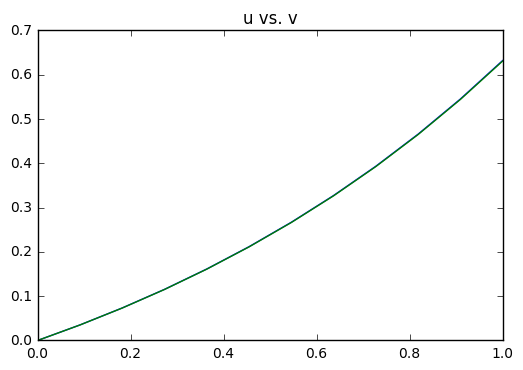

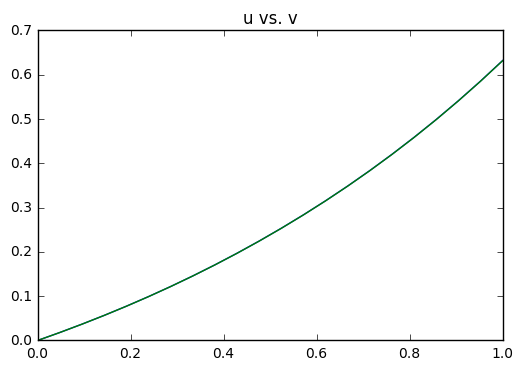

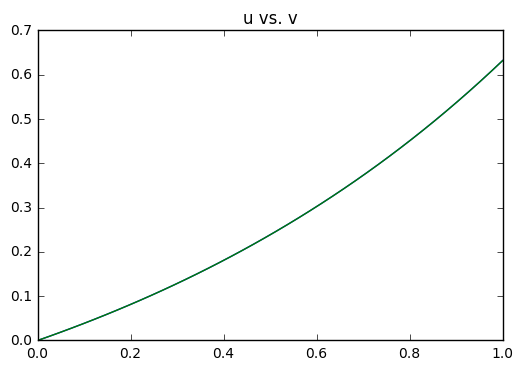

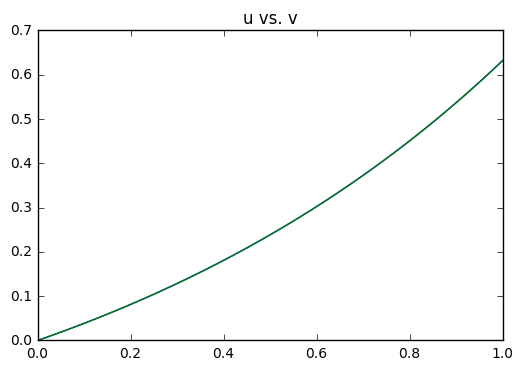

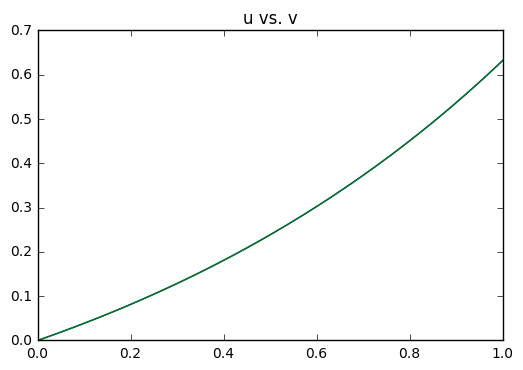

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline
n = [10,20,40,80,160]
h = np.zeros(len(n))
alpha = np.zeros(len(n))
Er = np.zeros(len(n))
count = 0
for n in n:
    b = np.zeros(n+1)
    v = np.zeros(n+2)
    A = np.zeros((n+1,n+1))
    x = np.linspace(0,1,n+2)
    h[count] = x[1]-x[0]
    np.fill_diagonal(A,2)
    A+=np.diag(-1*np.ones(n),-1)
    A+=np.diag(-1*np.ones(n),1)
    A[n,n-1] += -1
    b = -h[count]**2*np.exp(x-1)
    b[-1] = b[-1]+2*h[count]
    v[1:] = np.linalg.solve(A,b[1:])
    u = np.exp(-1)*(np.exp(x)-1) 
    Er[count] = np.max(np.abs(v-u))
    if count ==0:
        print 'The error between the real and discrete solution is', Er[count]
    else:
        print 'The error for n =',n, 'is',Er[count]
        print 'The rate of convergence is', np.log(Er[count]/Er[count-1])/(np.log(h[count]/h[count-1]))
    plt.figure(count)
    plt.plot(x,u,x,v)
    plt.title('u vs. v')
    count +=1



## Conclusion: Scheme 1 has a linear convergence rate, while scheme 2 has a quadratic convergence rate. This demonstrates that the convergence rate of a finite difference scheme can be bottlenecked by a single finite difference evaluation. The first scheme used a normal forward difference method to evaluate the Neumann boundary condition, which analytically has been shown to have a linear convergence rate. Scheme 2 uses a forward difference method to evaluate the Neumann boundary condition, which has been shown to have a quadratic convergence rate.